In this notebook, we are going to create an example of how to use the Lower Stair filtration and compute the persistence entropy from their persistence diagrams, as they have been done in next article: https://www.sciencedirect.com/science/article/abs/pii/S0165168416303486

1. Import libraries and functions.

In [4]:
# import created library with specific functions
import matplotlib.pyplot as plt
import numpy as np
import importlib.util
from pathlib import Path
ruta_archivo = "functions.py" #path of where it is located the functions.py
spec = importlib.util.spec_from_file_location("functions", ruta_archivo)
fu = importlib.util.module_from_spec(spec)
spec.loader.exec_module(fu)

2. Defined the signal. In this case, we are going to work with the first data use in the article that is composed of 3 points

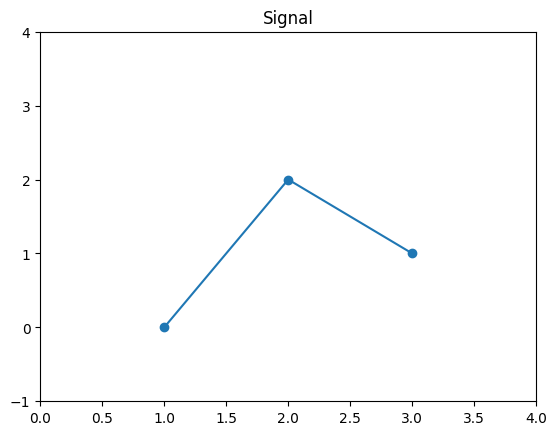

In [11]:
t = np.array([1,2,3])
y = np.array([0,2,1])
plt.plot(t,y,'-o')
plt.title(f"Signal")
plt.xlim(0,4)
plt.ylim(-1,4)
plt.show()

3. Compute lower stair filtration and visualize it

In [13]:
dgms = fu.calculatePersistenceDiagrams_LowerStair(t,y)
dgms

[array([[ 1.,  2.],
        [ 0., inf]]),
 array([], shape=(0, 2), dtype=float64)]

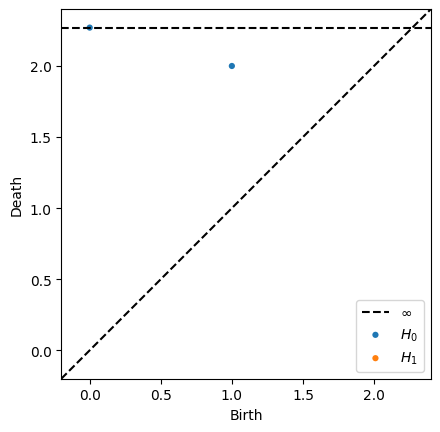

In [16]:
fu.plot_diagrams(dgms)

4. Calculate for example the persistence diagram for dimension 0 and visualize it.

In [15]:
dgm = fu.obtainDiagramDimension(dgms,0)
dgm

array([[ 1.,  2.],
       [ 0., inf]])

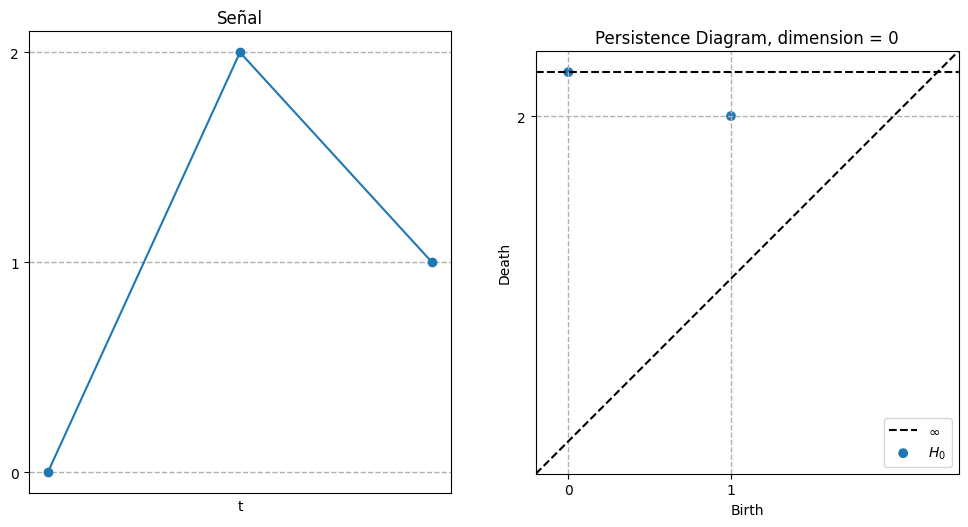

In [20]:
fu.plotSignal_PersistentDiagram(t,y,0)

5. We truncate the value of infinity by the maximum value of the filter, in this article, defined as the maximum value of the signal + 1, to take into account all the intervals when calculating the persistent entropy.

In [22]:
dgmL = fu.limitDiagramLowerStair(dgm,max(y))
dgmL

array([[1., 2.],
       [0., 3.]])

6. Calculate persistence entropy for diagram of dimension 0.

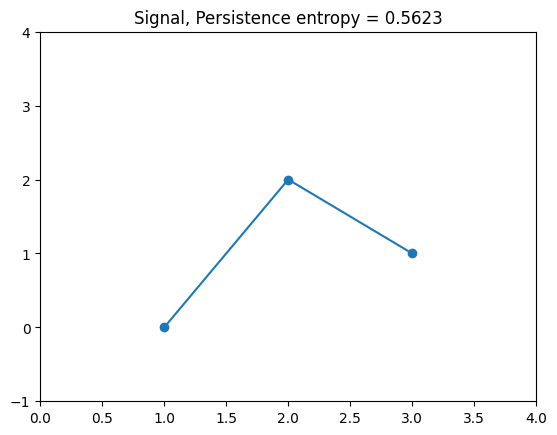

In [25]:
entropy = fu.computePersistenceEntropy(dgmL)

t = np.array([1,2,3])
y = np.array([0,2,1])
plt.plot(t,y,'-o')
plt.title(f"Signal, Persistence entropy = {entropy}")
plt.xlim(0,4)
plt.ylim(-1,4)
plt.show()